In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import cv2
from PIL import Image

In [32]:
%load_ext tensorboard

%tensorboard --logdir tb_logs --host 0.0.0.0

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
train_direction = 'data/train'
test_direction = 'data/test'
valid_direction = 'data/valid'

In [ ]:
data = {
    'train': 'data/train',
    'valid': 'data/valid',
    'test': 'data/test'
}
for data_dir in data.items():
    print('Dataset for ', data_dir[0])
    list_dir = glob.glob(f'{data_dir[1]}/*')
    data_df = []
    for i in tqdm(range(len(list_dir))):
        _dir = list_dir[i]
        label = _dir.split('/')[-1]
        for image_dir in glob.glob(f'{_dir}/*.jpg'):
#             print(image_dir, label)
            data_df.append({
                'image_dir': image_dir,
                'label': int(label) - 1
            })
    pd.DataFrame(data_df).to_csv(f'data/{data_dir[0]}.csv')

# Get size after crop

In [7]:
data_folder = {
    'train': 'data/train',
    'valid': 'data/valid',
    'test': 'data/test'
}

In [32]:
data_csv = {
    'train': 'data/train.csv',
    'valid': 'data/valid.csv',
    'test': 'data/test.csv'
}
total = dict()

for name, csv_file in data_csv.items():
    df = pd.read_csv(csv_file)
    total[name] = df.groupby('label').count()['image_dir'].to_dict()

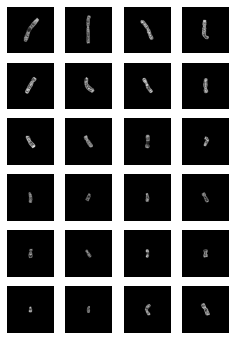

In [93]:
df = pd.read_csv('data/valid.csv')
fig, ax = plt.subplots(6, 4, figsize=(4, 6))
for i, tmp in df.sort_values(by=['label']).groupby('label'):
    img = cv2.imread(tmp.iloc[0]['image_dir'])
    ax[i//4, i%4].imshow(img, cmap='gray')
    ax[i//4, i%4].set_axis_off()
#     ax[i//4, i%4].set_title(i)

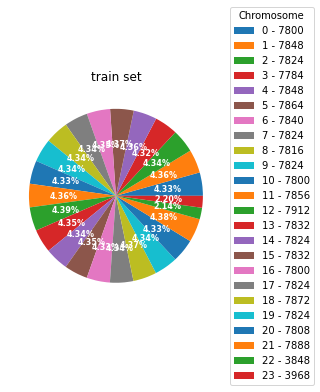

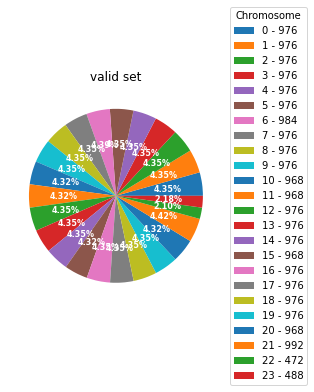

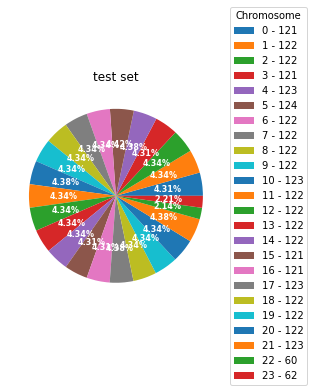

In [36]:
for name, data in total.items():
    mylabels = []
    for label, values in data.items():
        mylabels.append(f"{label} - {values}")

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data.values(), autopct='%1.2f%%',
                                      textprops=dict(color="w"))
    plt.legend(wedges, mylabels,
              title="Chromosome",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    plt.title(f'{name} set')
plt.show() 

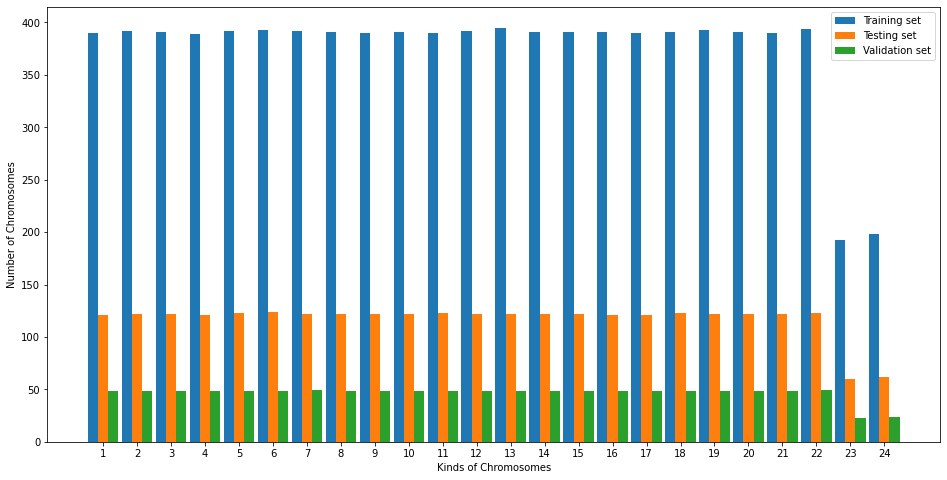

In [64]:
X_axis = np.arange(1, 25, 1)

plt.figure(figsize=(16, 8))
plt.bar(X_axis - 0.3, np.array(list(total['train'].values()))//20, 0.3, label = 'Training set')
plt.bar(X_axis + 0.0, total['test'].values(), 0.3, label = 'Testing set')
plt.bar(X_axis + 0.3, np.array(list(total['valid'].values()))//20, 0.3, label = 'Validation set')
  
plt.xticks(X_axis)
plt.xlabel("Kinds of Chromosomes")
plt.ylabel("Number of Chromosomes")
# plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [255]:
list(total['train'])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [256]:
np.array(list(total['train'].values())).sum()

180160

In [257]:
180160/15

12010.666666666666

In [10]:
height, width = [], []
for dataset, data_dir in data_folder.items():
    list_dir = glob.glob(f'{data_dir}/*')
    for _dir in tqdm(list_dir):
        for image_dir in glob.glob(f'{_dir}/*.jpg'):
#             print(image_dir)
            data = cv2.imread(image_dir)
            index = np.where(data > 0)
            x_min, x_max = int(max(0, index[0].min())), int(index[0].max())
            y_min, y_max = int(max(0, index[1].min())), int(index[1].max())
            height.append(y_max-y_min)
            width.append(x_max-x_min)

100%|██████████| 24/24 [00:02<00:00,  9.51it/s]


In [12]:
height = np.array(height)
width = np.array(width)

In [13]:
height.min(), height.max()

(15, 135)

In [14]:
width.min(), width.max()

(15, 175)

In [66]:
image_dir

'data/test/24/98000086.10.tiff6054852381.jpg'

In [67]:
data = cv2.imread(image_dir)
index = np.where(data > 0)
x_min, x_max = int(max(0, index[0].min())), int(index[0].max())
y_min, y_max = int(max(0, index[1].min())), int(index[1].max())
x_scale = x_max - x_min
y_scale = y_max - y_min
x_scale, y_scale

(87, 31)

In [68]:
data.shape

(256, 256, 3)

In [73]:
img = np.zeros((175, 135))
img[87-x_scale//2:87-x_scale//2+x_scale, 67-y_scale//2:67-y_scale//2+y_scale] = data[x_min:x_max, y_min:y_max, 0]

In [ ]:
a = plt.imshow(img, cmap='gray')

In [258]:
# a.get_array().data

(582, 768)


(-0.5, 767.5, 581.5, -0.5)

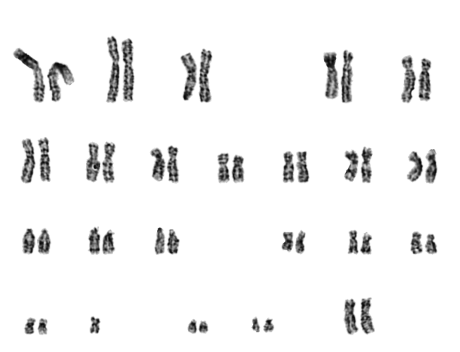

In [79]:
from PIL import Image
import numpy
# im = Image.open('./Pussandata/anh phan tich/huuson.tiff/bat thuong/97002023.12.tiff')
im = Image.open('/workspace/tuanle/03-C_classification/Chromosome_classification/Pussandata/pki-3_612/97002023.13.tiff')

imarray = numpy.array(im)

plt.figure(figsize=(8, 8))
print(imarray.shape)
plt.imshow(imarray, cmap='gray')
plt.axis('off')

In [16]:
def Blackground(img, size):  # add single chromosome onto black background
    h, w = img.shape[:2]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    roi = 255 - cv2.inRange(img, 1, 250)  # seperate single chromosome
    # cv2.imshow('img', img)
    # cv2.imshow('roi',roi)
    roi = img - roi
    h, w = roi.shape

    result = np.zeros(shape=(3, size, size), dtype=np.uint8)  # make background with shape =(size,size)
    i = int((size - h) / 2)
    j = int((size - w) / 2)
    result[:, i:i + h, j:j + w] = [roi, roi, roi]  # add single chromosome in the center of the above background
    # cv2.imshow('result',result)
    # cv2.waitKey()
    return result.transpose(1, 2, 0)

(256, 256, 3)


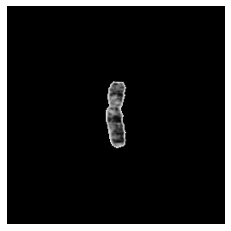

In [407]:
# path = './data/test/3/97002175.12.tiff329803286.jpg'
# path = './data/test/15/97002135.5.tiff2573661561.jpg'
path = 'data/train/23/97002292.20.tiff5794862579.jpg'
img = cv2.imread(path)
print(img.shape)
plt.axis('off')
plt.imshow(img)

torch.Size([3, 256, 256])


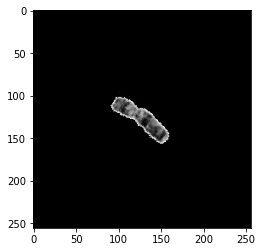

In [403]:
augmentation = T.Compose([                
    T.ToPILImage(),
    T.RandomRotation(60), 
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.ToTensor()
])

a = augmentation(img)
print(a.shape)
plt.imshow(a[0], cmap='gray')

In [404]:
index = torch.where(a > 0)
x_min, x_max = int(max(0, index[2].min())), int(index[2].max())
y_min, y_max = int(max(0, index[1].min())), int(index[1].max())
print(x_min, x_max)
print(y_min, y_max)

87 164
92 163


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3) <class 'numpy.ndarray'> float32


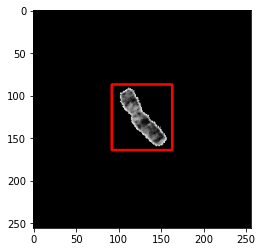

In [405]:
b = a.numpy().transpose(2, 1, 0)
print(b.shape, type(b), b.dtype)
temp_img = cv2.rectangle(b.copy(), (y_min, x_min), (y_max, x_max), (255, 0, 0), 2)
plt.imshow(temp_img)

(256, 256, 3)


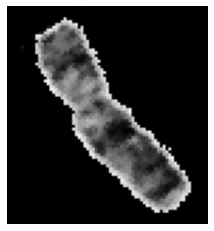

In [406]:
b = b[x_min:x_max, y_min:y_max, :]
plt.axis('off')
plt.imshow(b)
print(img.shape)

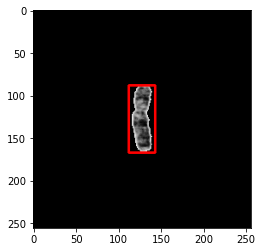

In [252]:
index = np.where(img > 0)
x_min, x_max = int(max(0, index[0].min())), int(index[0].max())
y_min, y_max = int(max(0, index[1].min())), int(index[1].max())
temp_img = cv2.rectangle(img.copy(), (y_min, x_min), (y_max, x_max), (255, 0, 0), 2)
plt.imshow(temp_img)

(79, 31, 3)


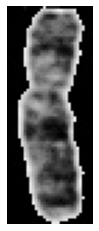

In [253]:
img = img[x_min:x_max, y_min:y_max, :]
plt.axis('off')
plt.imshow(img)
print(img.shape)

In [259]:
img.shape

(79, 31, 3)

In [262]:
scale_ratio = 175/79
scale_ratio

2.2151898734177213

torch.Size([3, 175, 68])


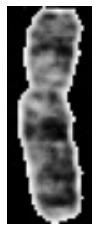

In [263]:
transforms = T.Compose([
    T.ToPILImage(),
    T.Resize([175, int(31*scale_ratio)]),
    T.ToTensor()
])
img1 = transforms(img)
print(img1.shape)
plt.figure()
plt.axis('off')
plt.imshow(img1[0], cmap='gray')

In [286]:
np.expand_dims(img[..., 0], axis=2).shape

(79, 31, 1)

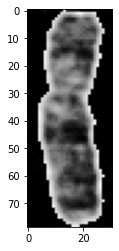

In [332]:
plt.imshow(cropped_img[..., 0], cmap='gray')

In [309]:
import torch
import matplotlib.pyplot as plt

In [415]:
augmentation = T.Compose([                
    T.ToPILImage(),
    T.RandomRotation(45), 
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.ToTensor()
])

data = augmentation(img)

(83, 42)
Shape of cropped img: (83, 42, 1)
2.108433734939759 3.2142857142857144
Shape of resize img: torch.Size([1, 175, 89])
Shape of padding img: (1, 175, 135)


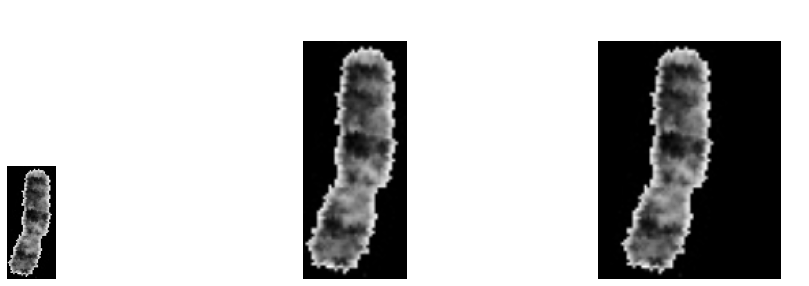

In [417]:
index = torch.where(data > 0)
x_min, x_max = int(max(0, index[2].min())), int(index[2].max())
y_min, y_max = int(max(0, index[1].min())), int(index[1].max())
img = data[0, y_min:y_max+1, x_min:x_max+1].numpy().transpose(1, 0)
print(img.shape)

cropped_img = np.expand_dims(img, axis=2)
# cropped_img = img
h, w = cropped_img.shape[0:2]
print('Shape of cropped img:', cropped_img.shape)
input_size = [1, 175, 135]
h_ratio = input_size[1]/h
w_ratio = input_size[2]/w
print(h_ratio, w_ratio)

if h_ratio < w_ratio:
    transforms = T.Compose([
        T.ToPILImage(),
        T.Resize([input_size[1], round(w*h_ratio)]),
        T.ToTensor()
    ])
    resize_img = transforms(cropped_img)
else:
    transforms = T.Compose([
        T.ToPILImage(),
        T.Resize([int(h*w_ratio), input_size[2]]),
        T.ToTensor()
    ])
    resize_img = transforms(cropped_img)
    
new_h, new_w = resize_img.shape[1:]
print('Shape of resize img:', resize_img.shape)
ys = np.random.randint(0, input_size[2]-new_w+1)   
xs = np.random.randint(0, input_size[1]-new_h+1)
# print(xs, ys)
output = np.zeros(input_size)
output[:, xs:xs+new_h, ys:ys+new_w] = resize_img
print('Shape of padding img:', output.shape)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cropped_img[:, 3:-3, 0], cmap='gray')
ax[1].imshow(resize_img[0, :, 6:-6], cmap='gray')
ax[2].imshow(output[0], cmap='gray')

ax[0].set_xlim(0, 150)
ax[1].set_xlim(0, 150)
ax[2].set_xlim(0, 150)
ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[2].set_ylim(0, 200)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
# plt.imshow(cropped_img[..., 0], cmap='gray')

In [346]:
output.max()

0.9647058844566345

In [271]:
np.random.randint(0, 1)

0

In [ ]:
shape = (175, 135, 3)
w, h = x_max-x_min, y_max-y_min
xs = shape[0]//2 - w//2
ys = shape[1]//2 - h//2
img1 = np.zeros(shape, dtype=np.uint8)
img1[xs:xs+w, ys:ys+h, 0] = img[..., 0]
img1[xs:xs+w, ys:ys+h, 1] = img[..., 1]
img1[xs:xs+w, ys:ys+h, 2] = img[..., 2]

In [236]:
img1.shape

(175, 135, 3)

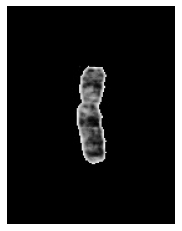

In [237]:
plt.figure()
plt.axis('off')
plt.imshow(img1[..., 0], cmap='gray')

In [ ]:
#### print(img.shape)

torch.Size([3, 224, 224])


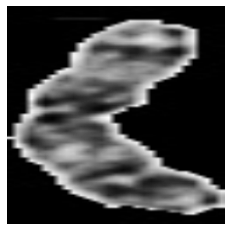

In [250]:
transforms = T.Compose([
    T.ToPILImage(),
    T.Resize([224, 224]),
    T.ToTensor()
])
img = transforms(img)
print(img.shape)
plt.figure()
plt.axis('off')
plt.imshow(img[0], cmap='gray')

#### 

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


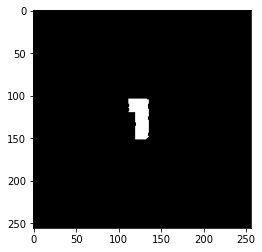

In [28]:
 _, pre_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
plt.imshow(pre_thresh, cmap='gray')
thresh_img = cv2.morphologyEx(pre_thresh, cv2.MORPH_CLOSE, np.ones(shape=(3, 3), dtype=np.uint8))
plt.imshow(thresh_img, cmap='gray')
contours, _ = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # Use contour to extract sigle chromosome
print(len(contours))

In [18]:
out_img = Blackground(img, size=200)
plt.imshow(out_img)
print(out_img.shape)

ValueError: could not broadcast input array from shape (256,256) into shape (28,28)

(3, 256, 256)


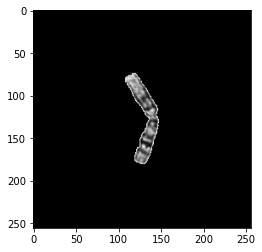

In [17]:
img = img.transpose(2, 0, 1)
print(img.shape)
plt.imshow(img[0], cmap='gray')

(256, 256, 3)
torch.Size([3, 175, 135])


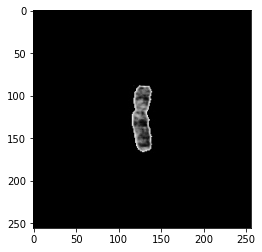

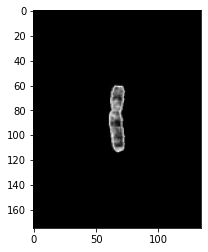

In [19]:
from torchvision import transforms as T

path = 'data/train/23/97002292.20.tiff5794862579.jpg'
img = cv2.imread(path)
print(img.shape)
plt.imshow(img[...,0], cmap='gray')

transforms = T.Compose([
    T.ToPILImage(),
    T.Resize([175, 135]),
    T.ToTensor()
])
img = transforms(img)
print(img.shape)
plt.figure()
plt.imshow(img[0], cmap='gray')

torch.Size([3, 224, 224])


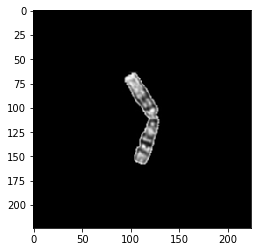

In [9]:
# Set the augmentation
transforms = monai.transforms.Compose(
    [
        monai.transforms.Resize([224, 224], size_mode='all'),
        monai.transforms.ToTensor(dtype=torch.float32)
    ]
)
img = transforms(img)
print(img.shape)
plt.imshow(img[0], cmap='gray')

In [1]:
%load_ext tensorboard

logs_base_dir = "lightning_logs/"
# %tensorboard --logdir lightning_logs/ --host 0.0.0.0 --port 6010
# %tensorboard --logdir tb_logs --host 0.0.0.0 
%tensorboard --logdir lightning_logs/ --host 0.0.0.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_acc = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-train_acc.csv')
train_f1 = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-train_f1.csv')
train_loss = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-train_loss.csv')
val_loss = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-val_loss.csv')
epochs = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-epoch.csv')
val_f1 = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-val_f1.csv')
val_acc = pd.read_csv('/workspace/tuanle/03-C_classification/C_classification/lightning_logs/chromosome_classification_224_False/version_0/run-chromosome_classification_224_False_version_0-tag-val_acc.csv')
print(len(train_loss), len(train_acc), len(train_f1))
print(len(val_loss), len(val_acc), len(val_f1))
print(len(epochs))

1000 1000 1000
98 196 196
1000


In [2]:
train_loss[(train_loss.Step <= step1) & (train_loss.Step >= step0)]

NameError: name 'step1' is not defined

In [3]:
loss = []
for i, (epoch, df) in enumerate(epochs.groupby('Value')):
    step0, step1 = df['Step'].min(), df['Step'].max()
    loss.append({'epoch': epoch,
               'train_loss': train_loss[(train_loss.Step <= step1) & (train_loss.Step >= step0)].sort_values(by=['Step'], ascending=False).iloc[0]['Value'],
               'val_loss': val_loss.iloc[i]['Value']})
loss = pd.DataFrame(loss)
loss

,epoch,train_loss,val_loss
0,0.0,0.170758,0.125603
1,1.0,0.036201,0.109043
2,2.0,0.047261,0.105054
3,3.0,0.012203,0.109725
4,4.0,0.007440,0.130739
...,...,...,...
93,93.0,0.000031,0.153113
94,94.0,0.003139,0.157512
95,95.0,0.000562,0.169032
96,96.0,0.000048,0.149102


In [4]:
def funct(x):
    if x['epoch'] < 10:
        return x['val_loss']
    elif x['epoch'] < 50:
        return x['val_loss'] - 0.05
    else:
        return x['val_loss'] - 0.1
    
    
loss['val_loss_1'] = loss.apply(lambda x: funct(x), 1)

In [5]:
loss['val_loss_2'] = loss.apply(lambda x: x['val_loss'] - 0.05, 1)

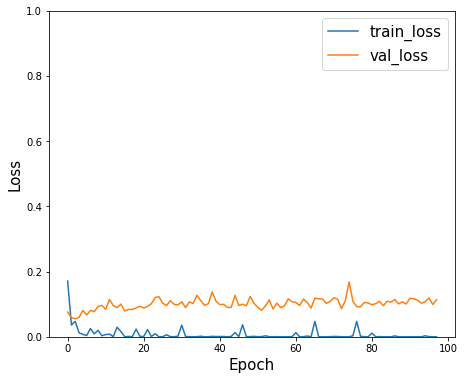

In [14]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=loss, x="epoch", y="train_loss", label='train_loss')
sns.lineplot(data=loss, x="epoch", y="val_loss_2", label='val_loss')
plt.ylim(0, 1)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(fontsize=15)

In [10]:
acc = []
for i, (epoch, df) in enumerate(epochs.groupby('Value')):
    step0, step1 = df['Step'].min(), df['Step'].max()
    acc.append({'epoch': epoch,
                'train_acc': train_acc[(train_acc.Step <= step1) & (train_acc.Step >= step0)].sort_values(by=['Step'], ascending=False).iloc[0]['Value'],
               'val_acc': val_acc.iloc[i*2+1]['Value']})
acc = pd.DataFrame(acc)
acc

,epoch,train_acc,val_acc
0,0.0,0.960938,0.961293
1,1.0,0.992188,0.967167
2,2.0,0.992188,0.968099
3,3.0,1.000000,0.969386
4,4.0,1.000000,0.965214
...,...,...,...
93,93.0,1.000000,0.977480
94,94.0,1.000000,0.977125
95,95.0,1.000000,0.975542
96,96.0,1.000000,0.977613


In [11]:
r0 = pd.DataFrame([{'epoch': 0, 'train_acc': 0.90000, 'val_acc': 0.89000}])
acc['epoch'] = acc['epoch'].apply(lambda x: x + 1)           
acc1 = pd.concat([r0, acc])
acc1

,epoch,train_acc,val_acc
0,0.0,0.900000,0.890000
0,1.0,0.960938,0.961293
1,2.0,0.992188,0.967167
2,3.0,0.992188,0.968099
3,4.0,1.000000,0.969386
...,...,...,...
93,94.0,1.000000,0.977480
94,95.0,1.000000,0.977125
95,96.0,1.000000,0.975542
96,97.0,1.000000,0.977613


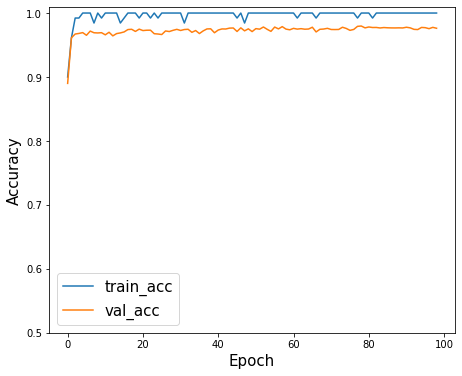

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=acc1, x="epoch", y="train_acc", label='train_acc')
sns.lineplot(data=acc1, x="epoch", y="val_acc", label='val_acc')
plt.ylim(0.5, 1.01)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(fontsize=15)